In [1]:
#!-*- coding: utf8 -*-
import re
import nltk
import string
import imageio
import warnings
import unicodedata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk import tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
""" Caso não tenha a biblioteca instalado é necessário instalar """

# !pip install wordcloud
# !pip install imageio
#!pip install Pillow

In [2]:
""" Importando os dados """
dados_imdb = pd.read_csv("./dados/imdb_ptBR.csv", encoding="utf-8")
# stemmer = nltk.stem.RSLPStemmer()

In [3]:
""" Convertendo as avaliações de String para números 
Avaliações Negativas = 0
Avaliações Positivas = 1
"""
classificacao = dados_imdb['sentiment'].replace(['neg', 'pos'], [0, 1])

In [4]:
""" Criando uma nova coluna no DataFrame com a conversão das avaliações de String para inteiro """
dados_imdb['classificacao'] = classificacao

In [5]:
""" Verificando a variedade de categoria da coluna sentiment """
print(dados_imdb.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [15]:
"""
Vetorizando a coluna TEXT_PT do Dataframe dados_imbd
Transformar os comentários dos filmes em um vetor posicional padrão que contém 50 palavras, com enconding UTF-8 e 
que todas as palavras estão em caixa baixa
"""

vetorizar = CountVectorizer(encoding='utf-8', max_features=200, lowercase=True)
bag_words = vetorizar.fit_transform(dados_imdb.text_pt)

In [6]:
primeiros_1000_comentarios = [texto for texto in dados_imdb.text_pt[:1000]]

In [11]:
"""Removendo as pontuações e as acentuações das palavras"""
for posicao in range(len(primeiros_1000_comentarios)):
    primeiros_1000_comentarios[posicao] = remove_stopwords(primeiros_1000_comentarios[posicao])

In [12]:
todas_palavras = ' '.join([texto for texto in primeiros_1000_comentarios])

In [ ]:
todas_palavras

In [13]:
"""
Transformando o Dataframe EMAILS_DADOS em listas de palavras e adicionando todas uma lista unica,
com todas as palavras em caixa baixa
"""
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)

In [ ]:
"""
Analisando as palavras depois do primeiro tratamento de remover stopwords 
"""
frequencia = nltk.FreqDist(token_frase)

df_freq = pd.DataFrame({"Palavra": list(frequencia.keys()),
                        "Frequência": list(frequencia.values())})
df_freq.nlargest(columns = "Frequência", n = 10)

In [ ]:
""" Verificando o total de palavras """
len(token_frase)

In [ ]:
todas_palavras = ' '.join([texto for texto in token_frase])

In [ ]:
"""
Criando um atributo SET e percorrendo a lista de listas de palavras, adicionando somente palavras não repitidas
"""
dicionario = set(token_frase)

In [ ]:
""" Visualizar as palavras que foram vetorizadas pelo CountVectorizer """
vetorizar.get_feature_names()

In [16]:
""" Separando a parte de treino e a parte de teste do modelo """
treino, teste, classe_treino, classe_teste = train_test_split(bag_words, dados_imdb.sentiment, random_state = 42)

In [ ]:
len(treino)

In [17]:
""" Instanciando o modelo que será usado: LogisticRegression"""
regressao_logistica = LogisticRegression()

In [18]:
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)

In [19]:
# Max_features = 50 to bag of words = 66.89%
# Max_features = 100 to bag of words = 71.19%
# Max_features = 150 to bag of words = 73.70%
print("Acuracia do modelo LogisticRegression, é de: {:.2f}" .format(100 * acuracia))

Acuracia do modelo LogisticRegression, é de: 88.39


In [21]:
todas_palavras = " ".join([texto for texto in dados_imdb.text_pt[:3]])

In [ ]:
""" Pode ser usado esse método da biblioteca SCIPY, porem esta em desuso e foi substituida pelo biblioteca IMAGEIO"""
from scipy.misc import imread

recife_mask = imread('./imagens/Brasil.png', flatten=True)

In [26]:
mapa_brasil = imageio.imread('./imagens/Brasil.png', format="PNG")

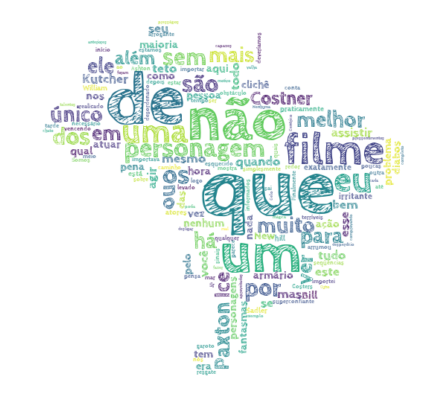

In [27]:
""" Criando um worlcloud para melhor visualizar os dados o capturados """

wordcloud = WordCloud(font_path='./imagens/CabinSketch-Bold.otf', width=800, height=500, margin=0, max_font_size=110, 
                      max_words=150, background_color="white", collocations=False, mask=mapa_brasil)

wordcloud.generate(todas_palavras)

# Salvando a imagem no diretório informado
# wordcloud.to_file('./imagens/wordcloud_mapa_brasil.png')

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
def remove_stopwords(text):
    """ Função resposavel por tirar tratar todos as stopwords e erros do texto """
    
    # Retirar as pontuações de cada texto
    regex = re.compile('[%s]' %re.escape(string.punctuation))
    
    # Criando atributo do tipo list
    palavras_filtradas = []
    
    #Criando um atributo do tipo list das palavras separadas por frase
    palavras = text.split()
    
    #Iterando sobre a lista de palavras
    for palavra in palavras:
        token = regex.sub(u'', palavra)
        if not token == u'':
            palavras_filtradas.append(token)
            
    #Setando as stopwords em uma variavel
    stop_words = set(stopwords.words('portuguese'))
    
    # Retirando os espaços das palavras e também retirando as palavras stopwords
    #content = [stemmer.stem(elemento) for elemento in palavras_filtradas if elemento.lower().strip() not in stop_words]
    content = [elemento for elemento in palavras_filtradas if elemento.lower().strip() not in stop_words]
    
    retorno = remove_acentuacao_emoticons(content)
   
    return retorno

In [10]:
def remove_acentuacao_emoticons(text):
    """ 
        Filtrando todas palavras para ficarem sem acento e remoção dos emoticons 
    """
        
    # Criando atributo do tipo list
    palavras_limpas = []
        
    for row in text:
        nfkd = unicodedata.normalize('NFKD', row)
        palavra_sem_acento = u"".join([elemento for elemento in nfkd if not unicodedata.combining(elemento)])
        
        regra = re.sub('[^a-zA-Z-9 \\\]'," ", palavra_sem_acento) 
        palavras_limpas.append(regra.lower().strip())
        
    # Iquinorar palarvas com extensão menor ou igual a dois e não pode ser numeral
    tokens = [t for t in palavras_limpas if len(t) > 2 and not t.isdigit()]
    
    retorno = ' '.join(tokens)
    
    return retorno